In [15]:
import csv
import pandas as pd
import numpy as np 
from sklearn.decomposition import PCA
from tkinter import *
from sklearn import preprocessing
import matplotlib.pyplot as plt

In [24]:
SalesOfMedicalDevices = pd.read_csv('SalesOfMedicalDevices.csv')

print(SalesOfMedicalDevices)

     Customer  year  NoOfSalesCalls  NoOfTargetedEmails  NoOfSales  \
0           1  2009               1                   2          3   
1           1  2010               1                   1          3   
2           1  2011               1                   2          0   
3           1  2012               3                   2          0   
4           1  2013               3                   3          3   
..        ...   ...             ...                 ...        ...   
606        47  2017               1                   2          1   
607        47  2018               0                   1          1   
608        47  2019               3                   2          2   
609        47  2020               5                   2          1   
610        47  2021               3                   3          0   

     CustomerSatisfaction  
0                      -1  
1                      -1  
2                       1  
3                       1  
4                  

In [23]:
SalesOfMedicalDevices.shape

(611, 6)

In [21]:
SalesOfMedicalDevices.head()

,Customer,year,NoOfSalesCalls,NoOfTargetedEmails,NoOfSales,CustomerSatisfaction
0,1,2009,0.2,0.666667,0.75,0.0
1,1,2010,0.2,0.333333,0.75,0.0
2,1,2011,0.2,0.666667,0.00,1.0
3,1,2012,0.6,0.666667,0.00,1.0
4,1,2013,0.6,1.000000,0.75,1.0


In [17]:
cols_to_normalize = ['NoOfSalesCalls', 'NoOfTargetedEmails', 'NoOfSales', 'CustomerSatisfaction']

for col in cols_to_normalize:
    SalesOfMedicalDevices[col] = (SalesOfMedicalDevices[col] - SalesOfMedicalDevices[col].min()) / (SalesOfMedicalDevices[col].max() - SalesOfMedicalDevices[col].min())

In [35]:
pcs = PCA(n_components=4)

pcs.fit(preprocessing.scale(SalesOfMedicalDevices[['NoOfSalesCalls', 'NoOfTargetedEmails', 'NoOfSales', 'CustomerSatisfaction']]))

PCA(n_components=4)

In [36]:
pcs = PCA(n_components=4)

pcs.fit(SalesOfMedicalDevices[['NoOfSalesCalls', 'NoOfTargetedEmails', 'NoOfSales', 'CustomerSatisfaction']])

pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_), 'Proportion of variance': pcs.explained_variance_ratio_,'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})

pcsSummary_df = pcsSummary_df.transpose() 

pcsSummary_df.columns = ['PC{}'.format(i) for i in range (1, len(pcsSummary_df.columns) + 1)] 

pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4
Standard deviation,1.6288,1.2938,0.7376,0.6914
Proportion of variance,0.4960,0.3129,0.1017,0.0894
Cumulative proportion,0.4960,0.8089,0.9106,1.0000


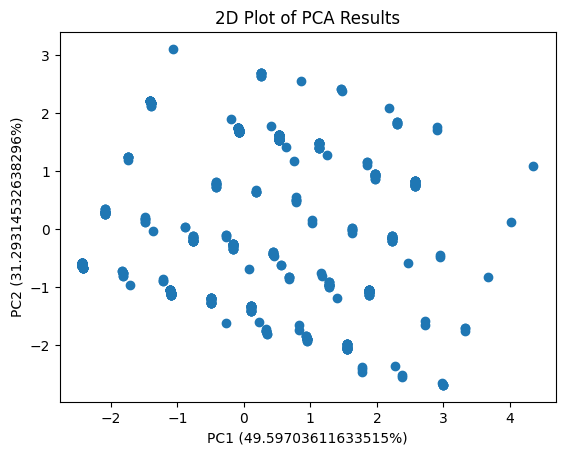

In [37]:
transformed_data = pcs.transform(SalesOfMedicalDevices[['NoOfSalesCalls', 'NoOfTargetedEmails', 'NoOfSales', 'CustomerSatisfaction']])

plt.scatter(transformed_data[:, 0], transformed_data[:, 1])

plt.xlabel('PC1 ({}%)'.format(pcsSummary_df.loc['Proportion of variance', 'PC1']*100))

plt.ylabel('PC2 ({}%)'.format(pcsSummary_df.loc['Proportion of variance', 'PC2']*100))

plt.title('2D Plot of PCA Results')

plt.show()